In [153]:
#Hello
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Loading the dataset from uci ml repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata




In [123]:
print(adult.metadata)
feature_names = X.columns
print(feature_names)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

#Metadata:
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
 
 'num_instances': 48842, 'num_features': 14,

 Feature names " 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',

Numerical Features : Age , fnlwgt ,education-num , capital gain , capital-los , hours-per-weel
Categorical Features: Workclass , educaion , marital-status , occupation , relationship , race , sex , native country


In [124]:
X.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [125]:
X.tail()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States


In [126]:
X.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [127]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


Converting the target value y to 0 for <= 50k and 1 for >50k 



In [128]:
y = y.to_numpy()


In [129]:
print(y)
for i in range(len(y)):
    if y[i][0] == '<=50K' or y[i][0] == '<=50K.':
        y[i][0] = 0
    else:
        y[i][0] = 1

y

[['<=50K']
 ['<=50K']
 ['<=50K']
 ...
 ['<=50K.']
 ['<=50K.']
 ['>50K.']]


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], shape=(48842, 1), dtype=object)

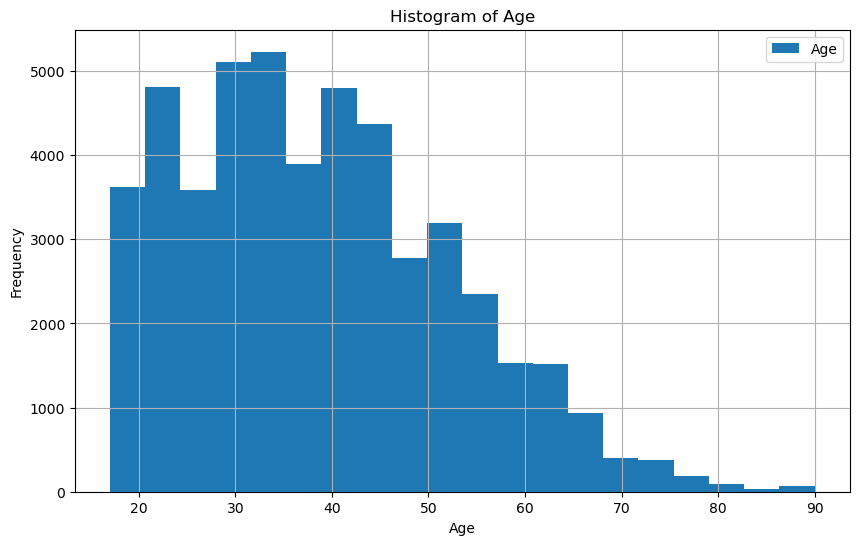

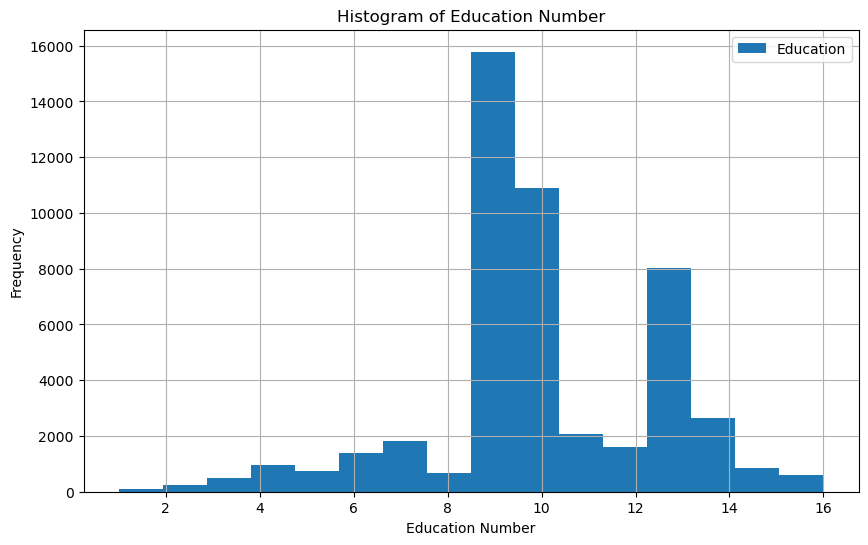

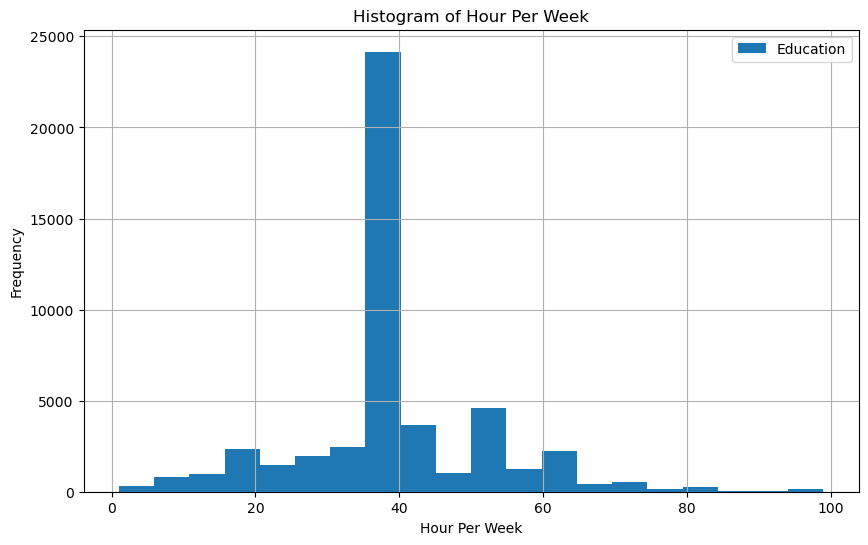

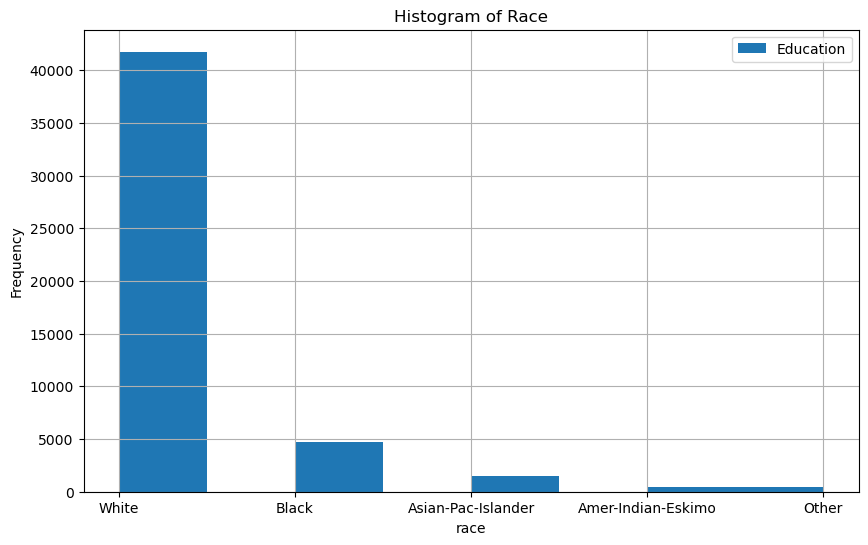

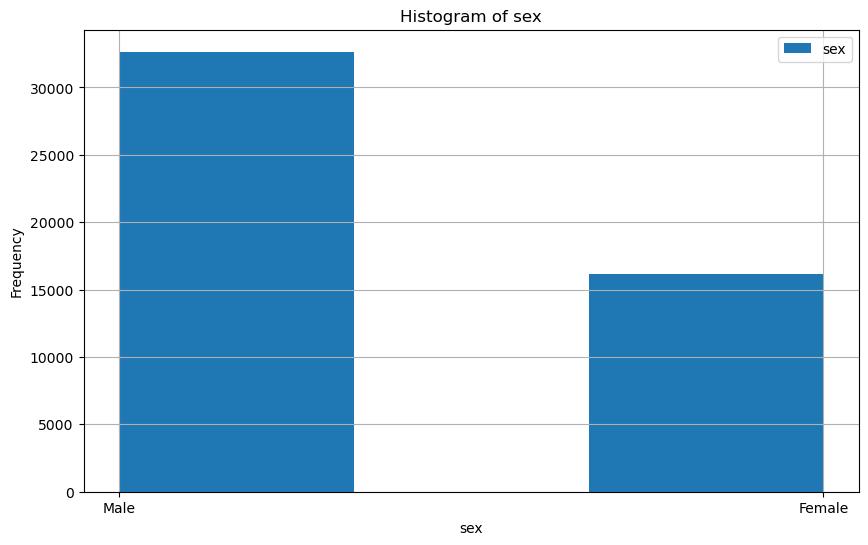

In [151]:
plt.figure(figsize=(10, 6))
X["age"].hist(bins=20, label="Age")
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

plt.figure(figsize=(10, 6))
X["education-num"].hist(bins=16, label="Education")
plt.legend()
plt.xlabel('Education Number')
plt.ylabel('Frequency')
plt.title('Histogram of Education Number')
plt.show()

plt.figure(figsize=(10, 6))
X["hours-per-week"].hist(bins=20, label="Education")
plt.legend()
plt.xlabel('Hour Per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hour Per Week')
plt.show()

plt.figure(figsize=(10, 6))
X["race"].hist(bins=8, label="Education")
plt.legend()
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Histogram of Race')
plt.show()

plt.figure(figsize=(10, 6))
X["sex"].hist(bins=3, label="sex")
plt.legend()
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

In [160]:
print("Hello world")

Hello world
